In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("RELA 275 Professors.xlsx", index_col="Professor")

In [ ]:
display(df)
indexes_professors = df.index #for later use

,Overall,Difficulty,Retake
Professor,,,
"Farnsworth, Brad",4.0,2.20,0.60
"Merrill, Byron",3.8,3.50,0.55
"Griffin, Tyler",4.5,2.50,0.84
"Hopkin, Shon",4.7,2.70,0.80
"Davis, Ryan",4.1,2.60,0.84
"Spencer, Joseph",4.3,2.44,0.78
"Frederick, Nicholas",4.6,2.00,0.95
"Swift, Charles",4.5,2.50,0.79
"Sharp, Ryan",4.7,2.50,0.94


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df)
df_norm = pd.DataFrame(data=data_scaled, columns=['Overall', 'Difficulty', 'Retake Rate'], index = indexes_professors)
display(df_norm)

,Overall,Difficulty,Retake Rate
Professor,,,
"Farnsworth, Brad",0.222222,0.133333,0.125
"Merrill, Byron",0.000000,1.000000,0.000
"Griffin, Tyler",0.777778,0.333333,0.725
"Hopkin, Shon",1.000000,0.466667,0.625
"Davis, Ryan",0.333333,0.400000,0.725
"Spencer, Joseph",0.555556,0.293333,0.575
"Frederick, Nicholas",0.888889,0.000000,1.000
"Swift, Charles",0.777778,0.333333,0.600
"Sharp, Ryan",1.000000,0.333333,0.975


In [ ]:
#invert Difficulty so it doesn't give inaccurate weight in final average
df_norm['Difficulty'] = 1.0 - df_norm['Difficulty']
#display(df_norm)

for row in df_norm.index:
  for col in df_norm.columns:
    if abs(df_norm.loc[row, col]) < 0.0000000001:
      df_norm.loc[row, col] = 0

display(df_norm)

,Overall,Difficulty,Retake Rate
Professor,,,
"Farnsworth, Brad",0.222222,0.866667,0.125
"Merrill, Byron",0.000000,0.000000,0.000
"Griffin, Tyler",0.777778,0.666667,0.725
"Hopkin, Shon",1.000000,0.533333,0.625
"Davis, Ryan",0.333333,0.600000,0.725
"Spencer, Joseph",0.555556,0.706667,0.575
"Frederick, Nicholas",0.888889,1.000000,1.000
"Swift, Charles",0.777778,0.666667,0.600
"Sharp, Ryan",1.000000,0.666667,0.975


In [ ]:
#Scale the categories for a final weighted average. Scales are broken down as follows (percentage):
# Overall - 30%
# Difficulty - 50%
# Retake Rate - 20%

df_norm['Overall'] *= 0.3
df_norm['Difficulty'] *= 0.5
df_norm['Retake Rate'] *= 0.2

display(df_norm)

,Overall,Difficulty,Retake Rate
Professor,,,
"Farnsworth, Brad",0.066667,0.433333,0.025
"Merrill, Byron",0.000000,0.000000,0.000
"Griffin, Tyler",0.233333,0.333333,0.145
"Hopkin, Shon",0.300000,0.266667,0.125
"Davis, Ryan",0.100000,0.300000,0.145
"Spencer, Joseph",0.166667,0.353333,0.115
"Frederick, Nicholas",0.266667,0.500000,0.200
"Swift, Charles",0.233333,0.333333,0.120
"Sharp, Ryan",0.300000,0.333333,0.195


In [ ]:
#Computes the weighted average and sorts the dataframe by highest weighted average
#to see the best professor.

df_norm['Weighted Average'] = df_norm.mean(axis=1)
df_norm.sort_values(by=['Weighted Average'], inplace=True, ascending=False)
display(df_norm)

,Overall,Difficulty,Retake Rate,Weighted Average
Professor,,,,
"Frederick, Nicholas",0.266667,0.500000,0.200,0.322222
"Sharp, Ryan",0.300000,0.333333,0.195,0.276111
"Griffin, Tyler",0.233333,0.333333,0.145,0.237222
"Hopkin, Shon",0.300000,0.266667,0.125,0.230556
"Swift, Charles",0.233333,0.333333,0.120,0.228889
"Spencer, Joseph",0.166667,0.353333,0.115,0.211667
"Davis, Ryan",0.100000,0.300000,0.145,0.181667
"Farnsworth, Brad",0.066667,0.433333,0.025,0.175000
"Merrill, Byron",0.000000,0.000000,0.000,0.000000


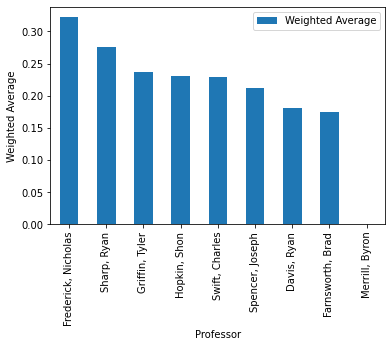

In [ ]:
#visualize

_ = df_norm.plot(kind='bar', y='Weighted Average')
_ = plt.ylabel('Weighted Average')
plt.show()